In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from glob import glob

In [8]:
path = '/Users/mehul.chopra/Downloads/data-analysis-data/weather_data_input/weather_data_set_*'
files = glob(path)
print(files)

['/Users/mehul.chopra/Downloads/data-analysis-data/weather_data_input/weather_data_set_1900', '/Users/mehul.chopra/Downloads/data-analysis-data/weather_data_input/weather_data_set_1901']


In [10]:
dfs = [pd.read_csv(file, sep='|', header=None, names=['stationno','year','datemonth','hourminute','temperature'])
           for file in files]

In [13]:
df = pd.concat(dfs, ignore_index=True)

In [14]:
df

,stationno,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


Max temperature on yearly basis

In [20]:
d1 = df.dropna()
d2 = d1[['year', 'temperature']]
d3 = d2.groupby('year')
max_temp_yearly = d3.max()
max_temp_yearly

,temperature
year,
1900,34.0
1901,45.0


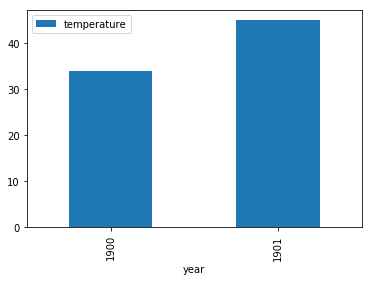

In [21]:
max_temp_yearly.plot(kind='bar')
plt.show()

In [27]:
d2 = d1[['year','temperature', 'stationno']]
d3 = d2.groupby(['year','stationno'])
max_temp_yearly_station = d3.max()

In [28]:
max_temp_yearly_station

temperature
year stationno             
1900 3300              30.0
     3301              34.0
1901 3300              45.0
     3301              22.0
     3302              35.0

In [32]:
d4 = max_temp_yearly_station.unstack()
d4

temperature            
stationno        3300  3301  3302
year                             
1900             30.0  34.0   NaN
1901             45.0  22.0  35.0

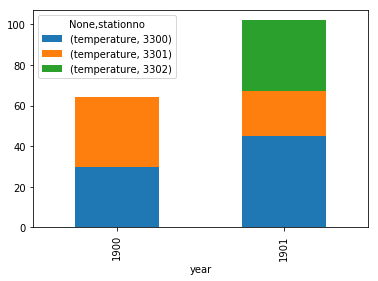

In [34]:
d4.plot(kind='bar', stacked=True)
plt.show()